In [1]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#1a
import csv
import zipfile
day = pd.read_csv('day.csv')
day_zero = day[day['yr']==0]
day_zero['clearday'] = day_zero['weathersit'].apply(lambda x:1 if x == 1 else 0)

day_zero['temp'] = (day_zero['temp'] - np.mean(day_zero['temp']))/np.std(day_zero['temp'])


<ipython-input-2-c194345c4ca2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_zero['clearday'] = day_zero['weathersit'].apply(lambda x:1 if x == 1 else 0)
<ipython-input-2-c194345c4ca2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_zero['temp'] = (day_zero['temp'] - np.mean(day_zero['temp']))/np.std(day_zero['temp'])


In [3]:
#1b
yvar = day_zero['registered']
x1 = day_zero['temp']
model_one = sm.OLS(yvar, x1)
regression_one = model_one.fit()
y_predictionone = regression_one.predict(x1)

x2 = np.column_stack((day_zero['temp'], (day_zero['temp'])**2))
x2 = sm.add_constant(x2)
model_two = sm.OLS(yvar, x2)
regression_two = model_two.fit()
y_predictiontwo = regression_two.predict(x2)

x3 = np.column_stack((day_zero['temp'], (day_zero['temp'])**2, day_zero['workingday']))
x3 = sm.add_constant(x3)
model_three = sm.OLS(yvar, x3)
regression_three = model_three.fit()
y_predictionthree = regression_three.predict(x3)

x4 = np.column_stack((day_zero['temp'], (day_zero['temp'])**2, day_zero['workingday'], day_zero['clearday']))
x4 = sm.add_constant(x4)
model_four = sm.OLS(yvar, x4)
regression_four = model_four.fit()
y_predictionfour = regression_four.predict(x4)

x5 = np.column_stack((day_zero['temp'], (day_zero['temp'])**2, day_zero['workingday'], day_zero['clearday'], day_zero['workingday']*day_zero['clearday']))
x5 = sm.add_constant(x5)
model_five = sm.OLS(yvar, x5)
regression_five = model_five.fit()
y_predictionfive = regression_five.predict(x5)

8018448.617811702
533036.1942647431
446767.2793880892
386882.0370830932
386269.8164299126


Text(0.5, 0, 'Complexity')

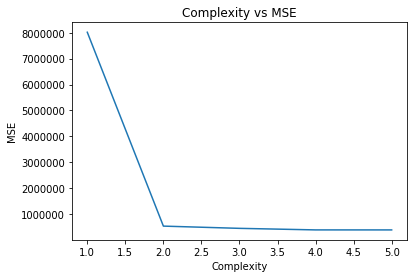

In [4]:
#1c Basic Models Comparison 
print(sm.tools.eval_measures.mse(yvar, y_predictionone))
print(sm.tools.eval_measures.mse(yvar, y_predictiontwo))
print(sm.tools.eval_measures.mse(yvar, y_predictionthree))
print(sm.tools.eval_measures.mse(yvar, y_predictionfour))
print(sm.tools.eval_measures.mse(yvar, y_predictionfive))

mse = [sm.tools.eval_measures.mse(yvar, y_predictionone),sm.tools.eval_measures.mse(yvar, y_predictiontwo), sm.tools.eval_measures.mse(yvar, y_predictionthree), sm.tools.eval_measures.mse(yvar, y_predictionfour), sm.tools.eval_measures.mse(yvar, y_predictionfive)]
plt.plot(np.arange(1,6), mse)
plt.title('Complexity vs MSE')
plt.ylabel('MSE')
plt.xlabel('Complexity')
#plt.ylim(0, 5000000)

Model 5 has the smallest SE. The trend the graph shows is the higher the complexity the lower the MSE

Text(0.5, 0, 'Complexity')

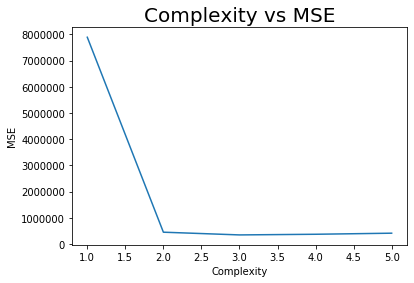

In [5]:
#Problem 2
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, yvar, train_size=0.8, test_size = 0.2)
hold1 = sm.OLS(ytrain1, xtrain1)
regression1 = hold1.fit()
first_holdout_prediction = regression1.predict(xtest1)

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, yvar, train_size=0.8, test_size = 0.2)
hold2 = sm.OLS(ytrain2, xtrain2)
regression2 = hold2.fit()
second_holdout_prediction = regression2.predict(xtest2)

xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x3, yvar, train_size=0.8, test_size = 0.2)
hold3 = sm.OLS(ytrain3, xtrain3)
regression3 = hold3.fit()
third_holdout_prediction = regression3.predict(xtest3)

xtrain4, xtest4, ytrain4, ytest4 = train_test_split(x4, yvar, train_size=0.8, test_size = 0.2)
hold4 = sm.OLS(ytrain4, xtrain4)
regression4 = hold4.fit()
fourth_holdout_prediction = regression4.predict(xtest4)

xtrain5, xtest5, ytrain5, ytest5 = train_test_split(x5, yvar, train_size=0.8, test_size = 0.2)
hold5 = sm.OLS(ytrain5, xtrain5)
regression5 = hold5.fit()
fifth_holdout_prediction = regression5.predict(xtest5)

#Now put all the test mse's in a 1x5 array below
hold_mses = [sm.tools.eval_measures.mse(ytest1, first_holdout_prediction),
             sm.tools.eval_measures.mse(ytest2, second_holdout_prediction),
             sm.tools.eval_measures.mse(ytest3, third_holdout_prediction),
             sm.tools.eval_measures.mse(ytest4, fourth_holdout_prediction),
             sm.tools.eval_measures.mse(ytest5, fifth_holdout_prediction)]
plt.plot(np.arange(1,6), hold_mses)
plt.title('Complexity vs MSE', fontsize = 20)
plt.ylabel('MSE')
plt.xlabel('Complexity')
#plt.ylim(0, 5000000)

9487837.511132115
592729.579277932
510778.61251746176
458009.11157792
458942.4484539682


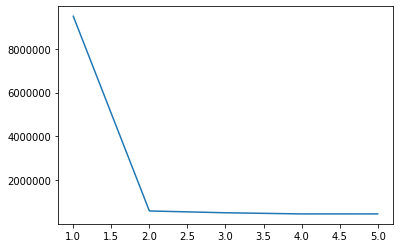

In [15]:
#Problem 3 Cross-Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


kf = KFold(10)
#create 5 mse brackets
mse1=[]
mse2=[]
mse3=[]
mse4=[]
mse5=[]
for train_index, test_index in kf.split(x1):
    xtrain1, xtest1 = x1[train_index], x1[test_index]
    ytrain1, ytest1 = yvar[train_index], yvar[test_index]

    cross1 = sm.OLS(ytrain1, xtrain1)
    regression1cross = cross1.fit()
    crossprediction1 = regression1cross.predict(xtest1)
    crossmse1 = sm.tools.eval_measures.mse(ytest1, crossprediction1)
    mse1.append(crossmse1)
print(np.mean(mse1))

for train_index, test_index in kf.split(x2):
    xtrain2, xtest2 = x2[train_index], x2[test_index]
    ytrain2, ytest2 = yvar[train_index], yvar[test_index]

    cross2 = sm.OLS(ytrain2, xtrain2)
    regression2cross = cross2.fit()
    crossprediction2 = regression2cross.predict(xtest2)
    crossmse2 = sm.tools.eval_measures.mse(ytest2, crossprediction2)
    mse2.append(crossmse2)
print(np.mean(mse2))

for train_index, test_index in kf.split(x3):
    xtrain3, xtest3 = x3[train_index], x3[test_index]
    ytrain3, ytest3 = yvar[train_index], yvar[test_index]

    cross3 = sm.OLS(ytrain3, xtrain3)
    regression3cross = cross3.fit()
    crossprediction3 = regression3cross.predict(xtest3)
    crossmse3 = sm.tools.eval_measures.mse(ytest3, crossprediction3)
    mse3.append(crossmse3)
print(np.mean(mse3))

for train_index, test_index in kf.split(x4):
    xtrain4, xtest4 = x4[train_index], x4[test_index]
    ytrain4, ytest4 = yvar[train_index], yvar[test_index]

    cross4 = sm.OLS(ytrain4, xtrain4)
    regression4cross = cross4.fit()
    crossprediction4 = regression4cross.predict(xtest4)
    crossmse4 = sm.tools.eval_measures.mse(ytest4, crossprediction4)
    mse4.append(crossmse4)
print(np.mean(mse4))

for train_index, test_index in kf.split(x5):
    xtrain5, xtest5 = x5[train_index], x5[test_index]
    ytrain5, ytest5 = yvar[train_index], yvar[test_index]

    cross5 = sm.OLS(ytrain5, xtrain5)
    regression5cross = cross5.fit()
    crossprediction5 = regression5cross.predict(xtest5)
    crossmse5 = sm.tools.eval_measures.mse(ytest5, crossprediction5)
    mse5.append(crossmse5)
print(np.mean(mse5))

plt.plot(np.arange(1,6), [np.mean(mse1), np.mean(mse2), np.mean(mse3), np.mean(mse4),np.mean(mse5)])


8020992.275633682
451148.03786885215
537712.351861576
392791.5961117199
451148.03786885215


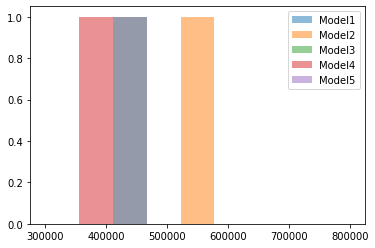

8020023.166244857
451929.85246920877
537436.886406441
392047.83225074003
451929.85246920877


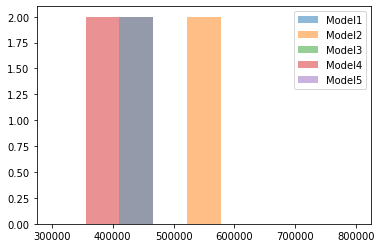

8023908.427156609
452624.85834602267
537235.1075440263
390834.9018698956
452624.85834602267


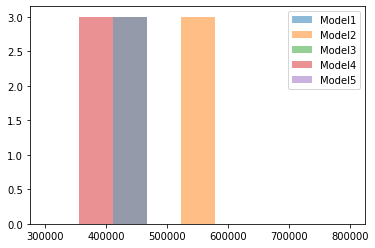

8022688.291064967
452172.3318223895
538521.2522062927
392053.7650545805
452172.3318223895


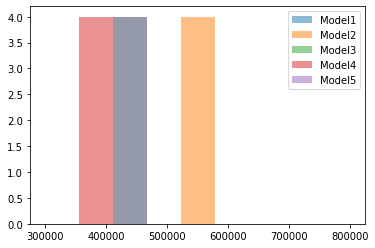

8022149.637546755
452211.29234456894
538301.5506988317
391935.3617883716
452211.29234456894


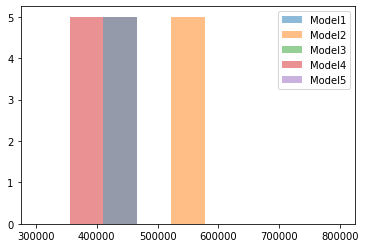

8021563.153412621
451366.0151992119
538239.818541803
391827.6152057106
451366.0151992119


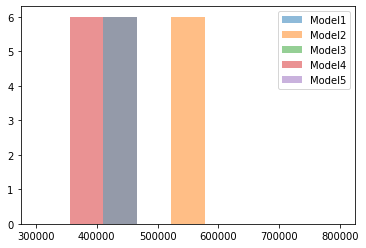

8024872.547801492
451322.8309199268
537525.8494119749
391792.6104976114
451322.8309199268


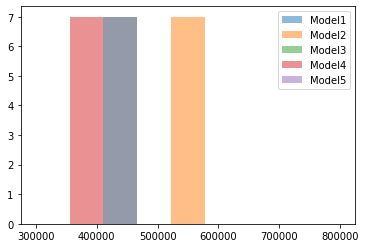

8025307.299577709
451045.5845927034
537603.9533655569
391982.24762680975
451045.5845927034


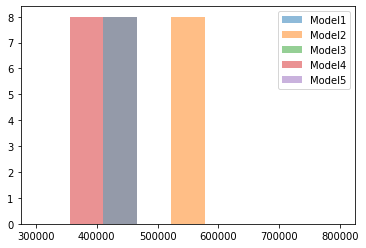

8028341.8842502665
450652.52114680596
537391.8202421148
391559.6660618451
450652.52114680596


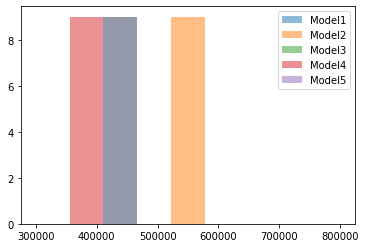

8028180.332171504
450837.2829706526
537073.5786857237
391481.20418353565
450837.2829706526


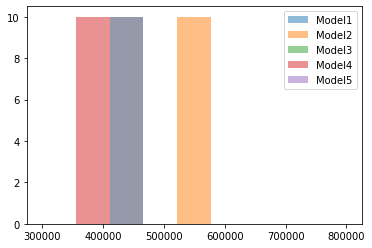

8027957.5322164
450595.852636205
537366.0282272773
391546.9627458824
450595.852636205


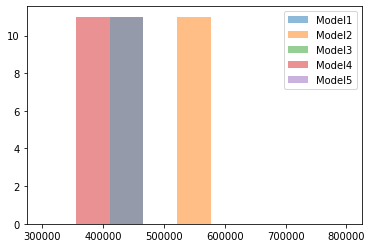

8035763.310800041
450403.95203477354
537629.0629886916
391425.13925545616
450403.95203477354


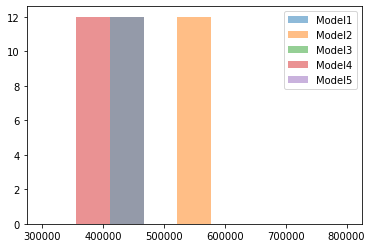

8035518.904678545
450250.3642644187
537734.3845375953
391191.04119391716
450250.3642644187


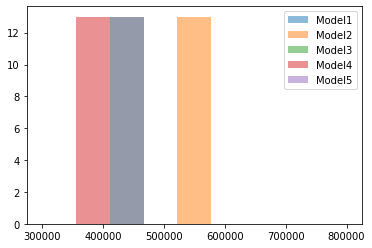

8036603.146435645
450213.65472585394
537675.149988861
391264.3842101513
450213.65472585394


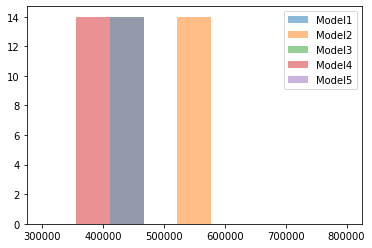

8035406.883999864
450094.43334892584
537567.544210499
391418.83489787375
450094.43334892584


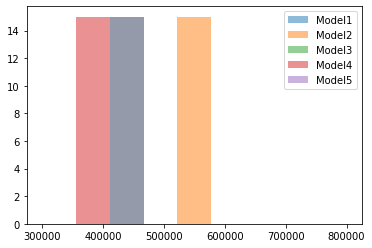

8036062.082712049
450123.9106980568
537310.1668089656
391277.33826149744
450123.9106980568


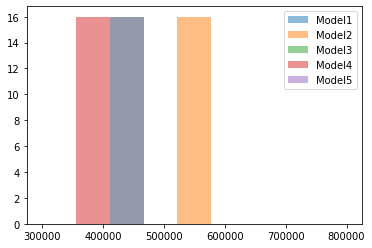

8035266.296313035
450206.3221074788
537338.0236169321
391315.6946141155
450206.3221074788


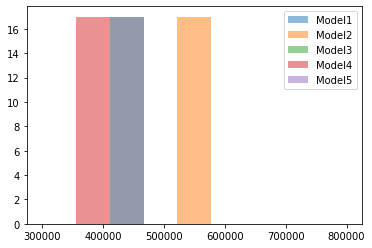

8035518.356292686
450598.0397536906
537262.6740859945
391841.8050471868
450598.0397536906


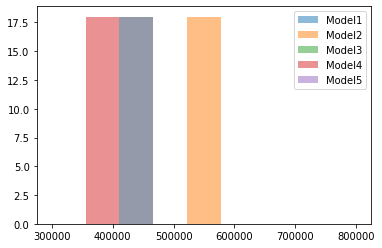

8034620.167802196
450475.71910224226
537276.7501478832
391953.2352958376
450475.71910224226


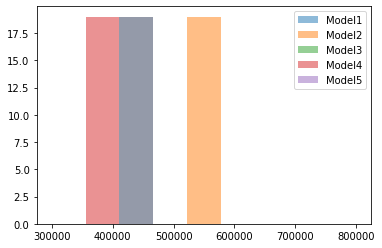

8033847.13313023
450311.9549966791
537312.0750560339
391733.566753741
450311.9549966791


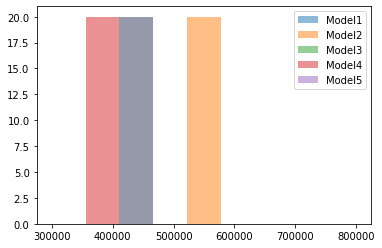

8033489.4052988915
450294.8449872428
537180.8826224651
391645.5622661772
450294.8449872428


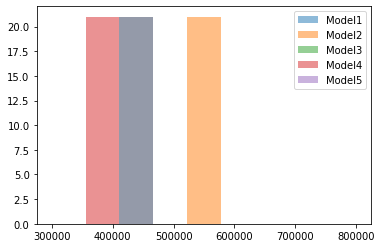

8033540.92299156
450265.8137179516
537225.3684203078
391591.84200966894
450265.8137179516


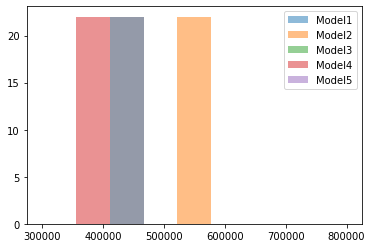

8032884.755940062
450316.8873760851
537095.8698880406
391615.79783337004
450316.8873760851


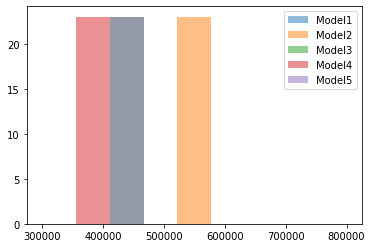

8032285.273286603
450384.14797611797
537001.8876608805
391588.04203796963
450384.14797611797


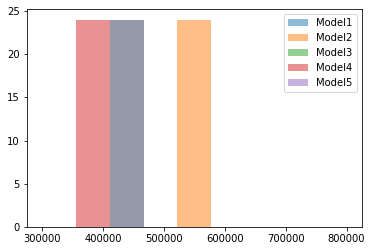

8032425.498796598
450376.21377402975
537206.9416571778
391459.984748933
450376.21377402975


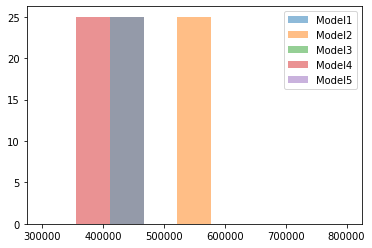

8032841.872608261
450275.5232486048
537128.5315443375
391350.80597424443
450275.5232486048


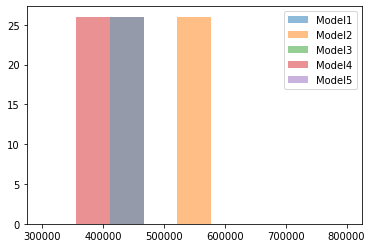

8032348.219756996
450458.260969805
537702.6255119657
391590.33514725644
450458.260969805


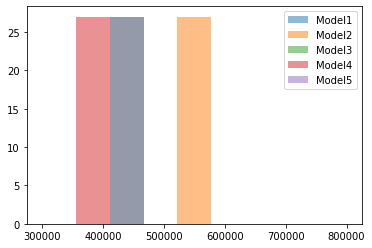

8033419.784393326
450500.35725260247
537564.1773149009
391585.4685143099
450500.35725260247


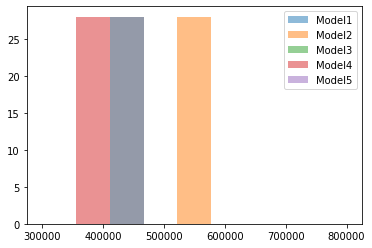

8033334.596092758
450436.9899100302
537475.5052546371
391560.2057126645
450436.9899100302


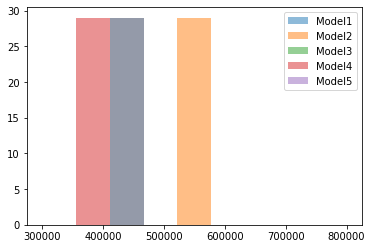

8033064.947353184
450593.76301632286
537386.555292504
391687.9814848961
450593.76301632286


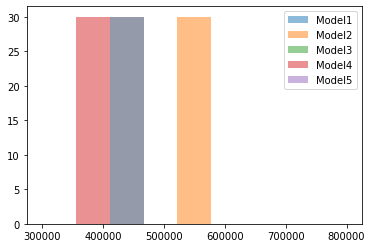

8032717.047422793
450879.79327095713
537407.7974951341
391594.4744548725
450879.79327095713


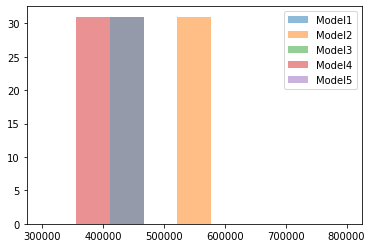

8033268.744728098
451265.94901317055
537350.6752999186
391480.05629931745
451265.94901317055


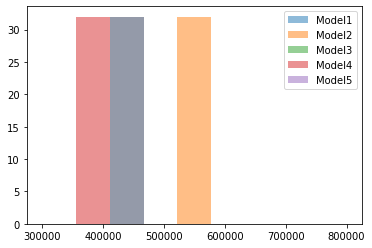

8032895.671682741
451257.6944257682
537286.9692491569
391469.63191142015
451257.6944257682


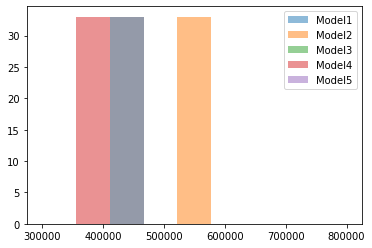

8033055.18438587
451368.90010197146
537369.8841723306
391376.5950923391
451368.90010197146


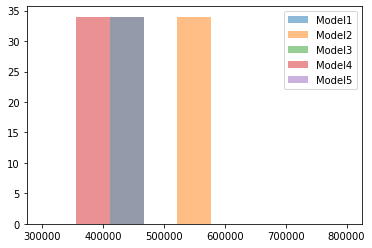

8032672.233058979
451261.76128717244
537303.3508444958
391362.4250340585
451261.76128717244


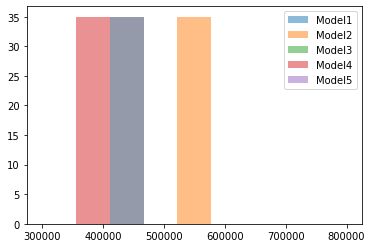

8032380.292906065
451340.82661013934
537328.1587269168
391360.4114662031
451340.82661013934


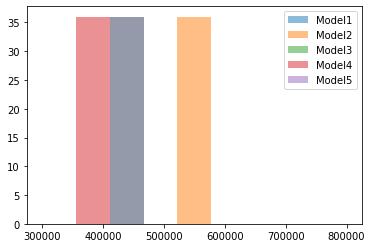

8032054.003758861
451301.1860311487
537285.7347191559
391300.5395821134
451301.1860311487


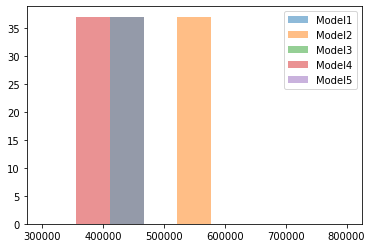

8032025.926128862
451285.1888342649
537201.5191183921
391340.6945759219
451285.1888342649


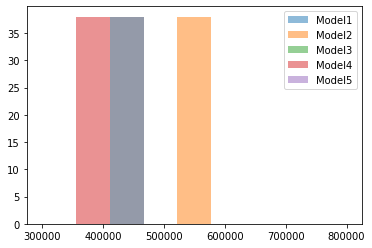

8031801.255385771
451355.4983349647
537222.4449102588
391266.3038792829
451355.4983349647


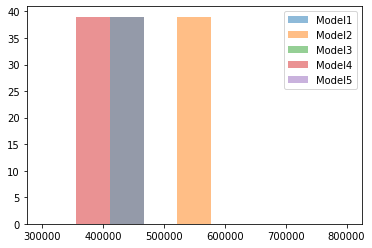

8031468.100597361
451279.6478465032
537244.5923889151
391311.76427424664
451279.6478465032


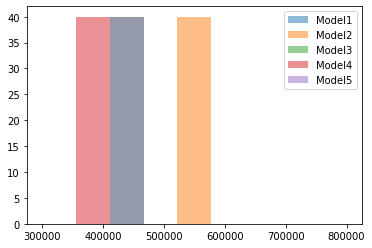

8032415.495398301
451224.44932245865
537292.3533909671
391390.4273220401
451224.44932245865


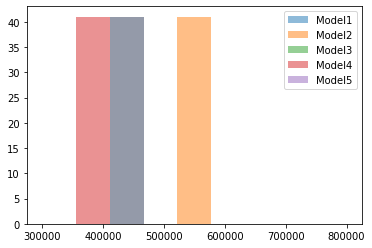

8032096.4690515315
451196.90555543685
537274.1217993887
391473.38636084046
451196.90555543685


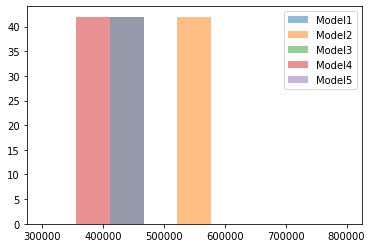

8031792.873589525
451155.2845603872
537332.9091687319
391415.4215761297
451155.2845603872


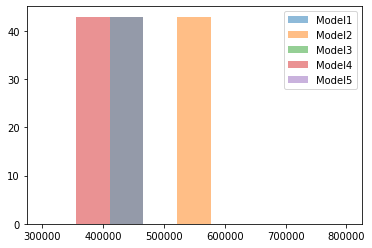

8031500.733370746
451123.2154672675
537344.3475242247
391336.55075599696
451123.2154672675


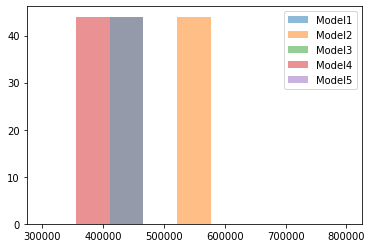

8031226.310265657
451092.3636066317
537363.0290465239
391490.466768078
451092.3636066317


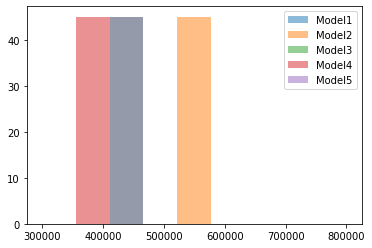

8031052.86703617
451189.42840806994
537316.0199073093
391426.2737392072
451189.42840806994


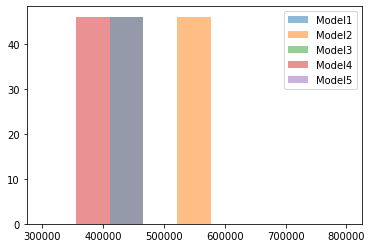

8031031.700676508
451180.24984680576
537287.2516133732
391472.1385729633
451180.24984680576


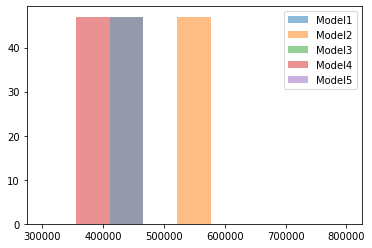

8030888.843095258
451182.04171974375
537222.9037198508
391578.9521122172
451182.04171974375


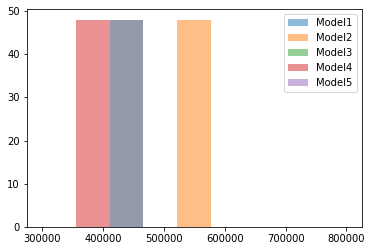

8030636.772157116
451101.666243623
537472.3057620202
391531.6673256268
451101.666243623


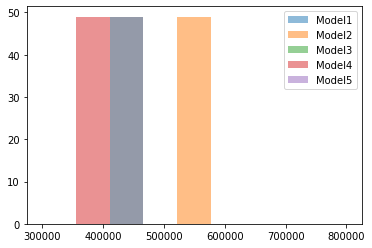

8030555.759430554
451039.47926728637
537625.0753274984
391551.43258322706
451039.47926728637


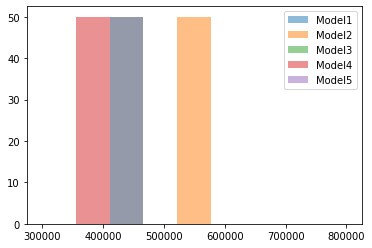

8030430.130348046
451104.61873190495
537595.3923801276
391566.5112302745
451104.61873190495


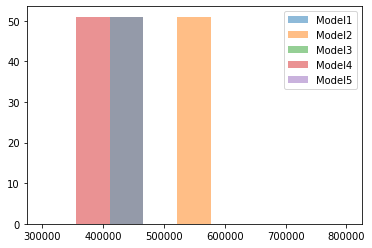

8032927.740418987
451171.9892955561
537521.7964509218
391542.9785940425
451171.9892955561


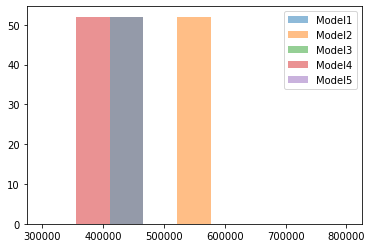

8033607.886466562
451146.20452942484
537515.1999129597
391533.5834087197
451146.20452942484


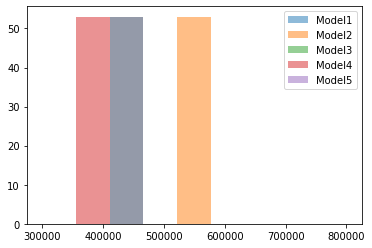

8033333.486641939
451115.0567499199
537481.3083721919
391524.1757540509
451115.0567499199


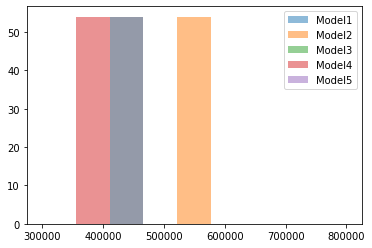

8034633.344365333
451253.6431784066
537408.5404774167
391614.20012852905
451253.6431784066


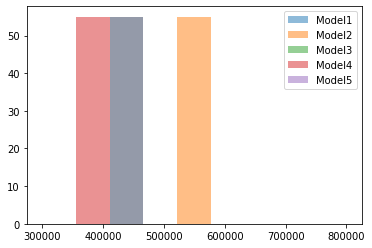

8034571.493903028
451243.5453189467
537422.7899849883
391622.0133027071
451243.5453189467


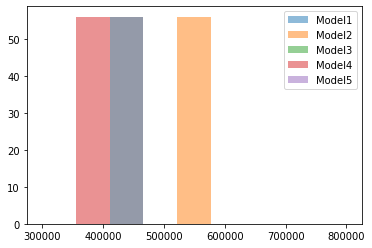

8034385.338201725
451261.1824014341
537440.8944899647
391647.8681944995
451261.1824014341


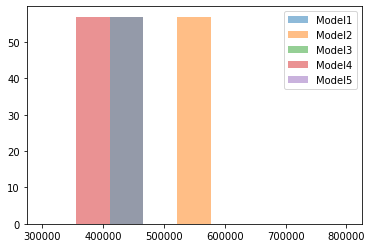

8034537.3561502015
451364.27526265825
537417.1190734734
391613.5718817911
451364.27526265825


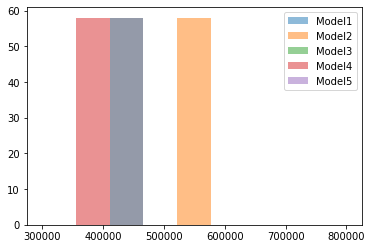

8034679.659385564
451338.7347560031
537364.9271508466
391629.7239691838
451338.7347560031


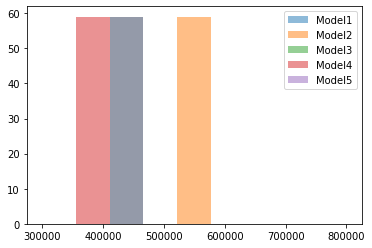

8034739.992079126
451299.6738267045
537378.9972621476
391699.8505536068
451299.6738267045


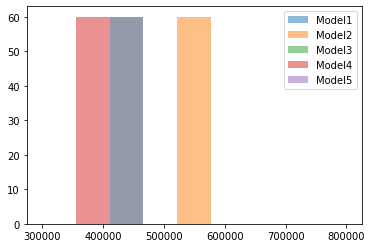

8034994.076915861
451310.304530709
537419.3418296549
391651.95170531044
451310.304530709


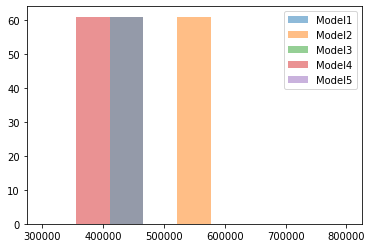

8034915.345296215
451246.9402183606
537361.8568122317
391656.9847987156
451246.9402183606


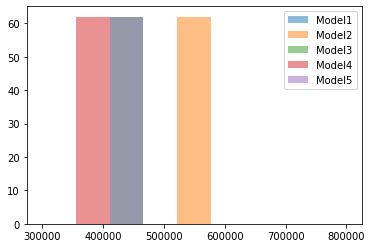

8035726.3957499685
451200.99693501514
537312.4689669622
391790.61024009396
451200.99693501514


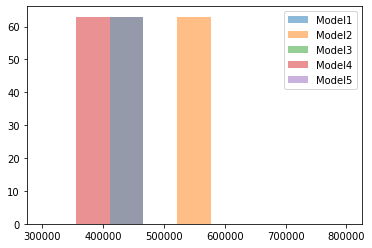

8035844.513795938
451194.0440829213
537269.1030986297
391804.7357959026
451194.0440829213


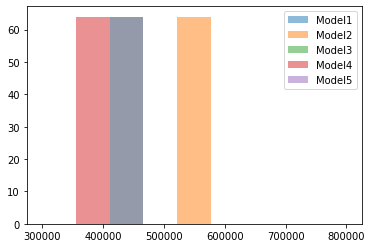

8035577.094476363
451208.48463263904
537250.1466816769
391766.5724064505
451208.48463263904


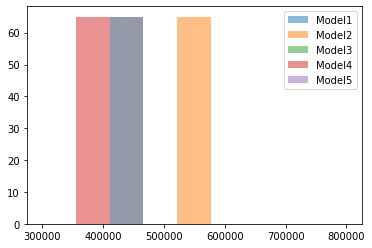

8036960.831525185
451144.75460792106
537246.1801304262
391698.2400988515
451144.75460792106


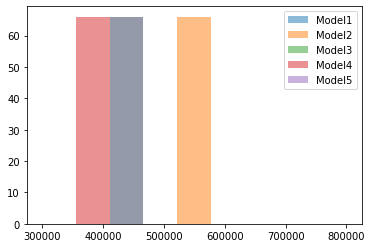

8036922.507011728
451131.4206430108
537260.233887913
391657.78005857725
451131.4206430108


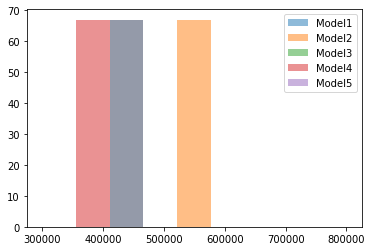

8036651.059584036
451089.47016529547
537337.0661038852
391621.18035585183
451089.47016529547


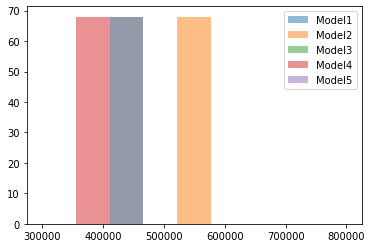

8036996.147799979
451062.51924551616
537294.7943806801
391589.5866852912
451062.51924551616


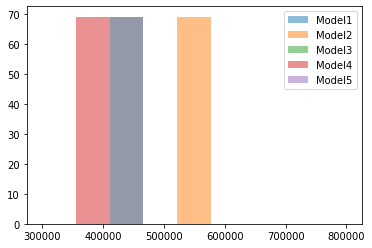

8036734.163076029
451056.1595417566
537376.3957173777
391623.34642887884
451056.1595417566


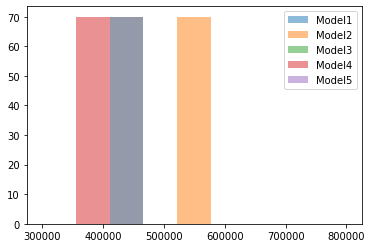

8037054.673937787
451013.26346320176
537369.9269684594
391658.15502753877
451013.26346320176


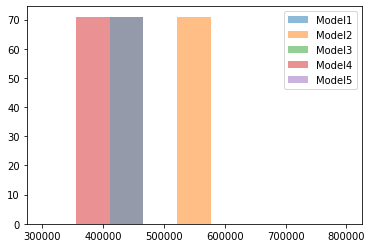

8037159.564854867
451004.17498775653
537347.1037773256
391600.0686107998
451004.17498775653


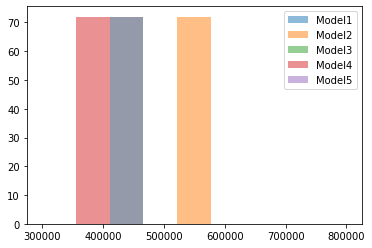

8036958.648653163
450951.0073007283
537310.6297538931
391658.1845509409
450951.0073007283


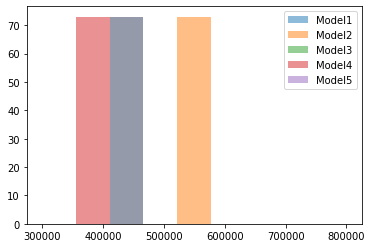

8036730.976331541
450937.4917805359
537261.1981583645
391643.24720416294
450937.4917805359


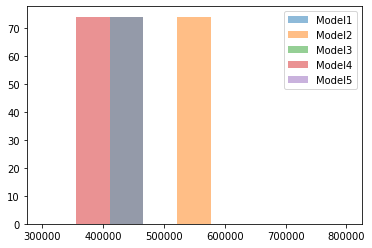

8036896.1797004985
450917.10612158844
537212.6113516879
391603.32177718787
450917.10612158844


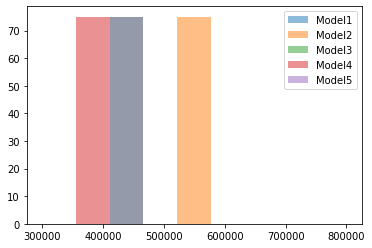

8036896.910357576
450920.7462952143
537197.0338171799
391552.7184248418
450920.7462952143


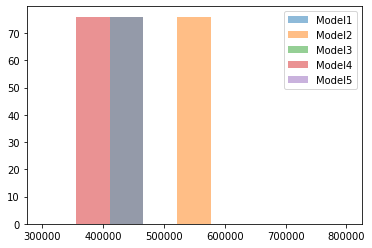

8037419.389132462
450890.23337723914
537156.7560776728
391644.14128872077
450890.23337723914


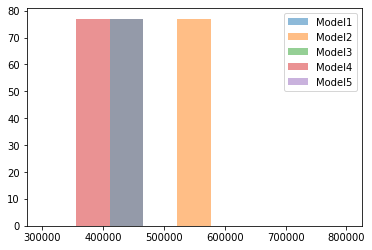

8037324.722441638
450978.32126023783
537105.2030476533
391622.1419995596
450978.32126023783


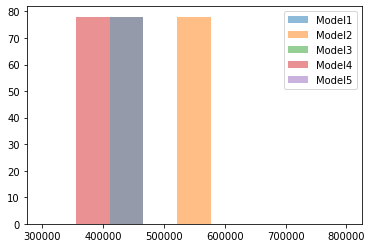

8037152.890141801
450956.92512686003
537074.5963042001
391617.0945653325
450956.92512686003


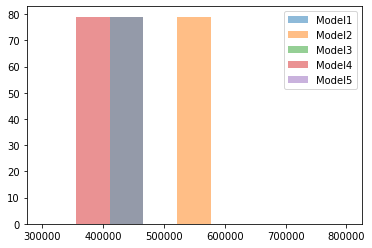

8036921.986189825
450940.19189833663
537038.4163615506
391622.82529086154
450940.19189833663


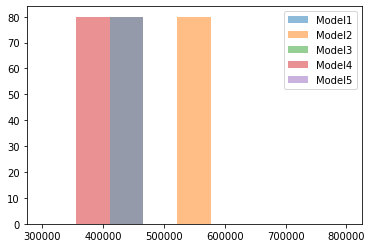

8036702.76085794
450945.46868664055
536992.2783811857
391612.80304814206
450945.46868664055


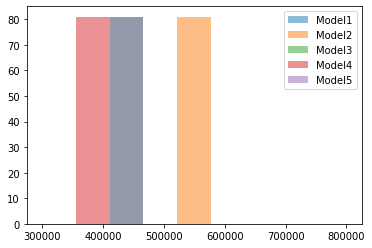

8036501.695031205
450936.07434161124
537005.7464899366
391610.4756134449
450936.07434161124


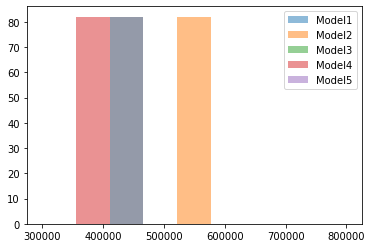

8038879.788746606
450938.8867258612
536986.9561666005
391578.4487708299
450938.8867258612


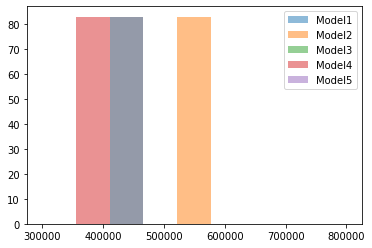

8039133.860167609
450943.9956914975
536979.3137531462
391590.3704192572
450943.9956914975


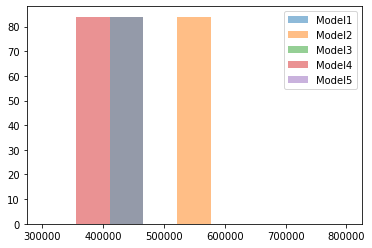

8038905.675174608
450981.59820239124
536989.1734693906
391563.21774640086
450981.59820239124


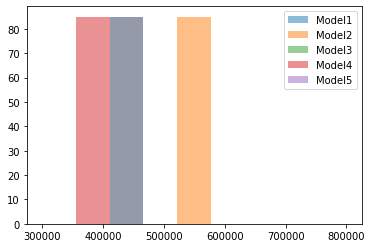

8038667.802852497
450972.7040206833
536995.4762265406
391585.54233422934
450972.7040206833


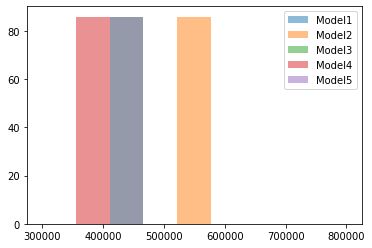

8038527.863945011
451057.61372217117
536979.6504665941
391632.67764839856
451057.61372217117


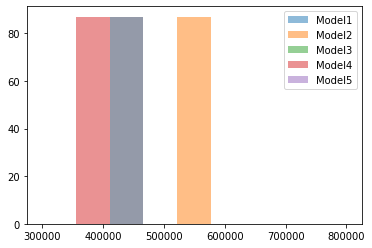

8038438.823486131
451149.0038724586
537105.771258704
391628.1718364314
451149.0038724586


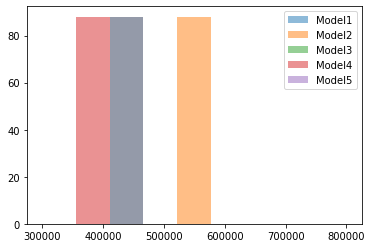

8038498.116078788
451112.9524400876
537077.5251619832
391610.82955779217
451112.9524400876


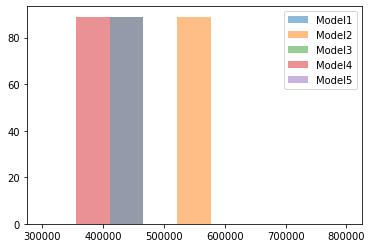

8038275.542279911
451104.71327096416
537034.932793324
391580.57055968326
451104.71327096416


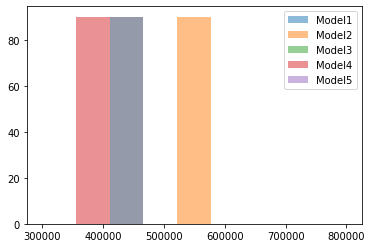

8038062.096772051
451105.63543965085
537038.1931713765
391554.2613482377
451105.63543965085


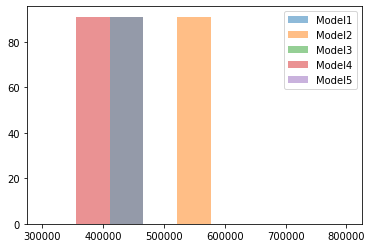

8037898.169309885
451183.86933812045
537030.7236582251
391521.9938906625
451183.86933812045


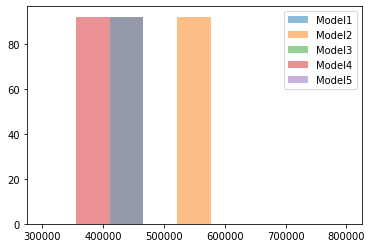

8037714.765472425
451203.82263235364
537037.1495196265
391491.97536866064
451203.82263235364


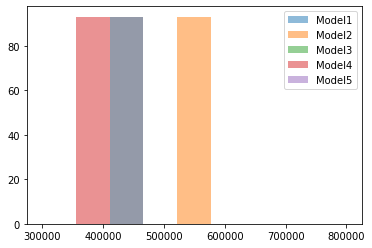

8037540.722873778
451199.3004971444
536998.5185633887
391490.53016905714
451199.3004971444


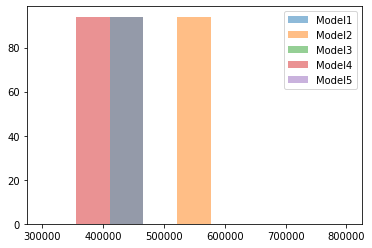

8037374.547368038
451171.62863704836
536978.98222848
391470.0463928565
451171.62863704836


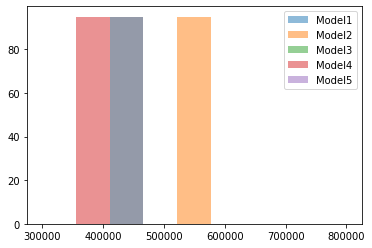

8037231.62183765
451162.4062222249
537121.1149406318
391484.8355317923
451162.4062222249


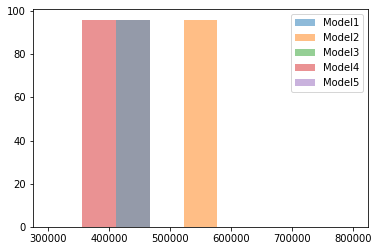

8037464.644551
451156.4227402924
537128.3348705793
391487.0795805955
451156.4227402924


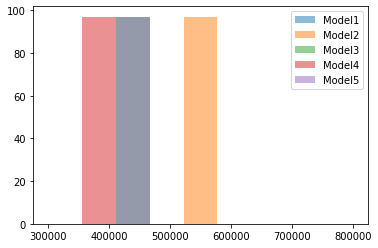

8037872.226207683
451128.2161154401
537130.7088406166
391496.37291342486
451128.2161154401


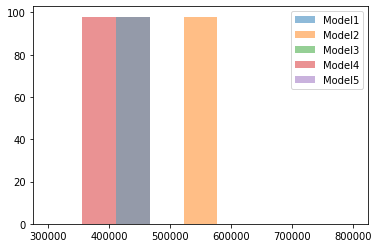

8038201.210280468
451109.05102653836
537135.2724571794
391569.3891411617
451109.05102653836


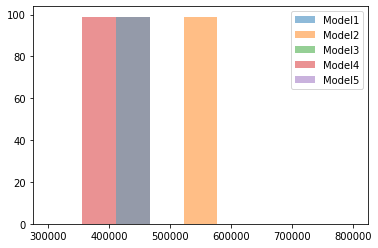

8038078.868095852
451107.4661157472
537217.8471598153
391573.3580665897
451107.4661157472


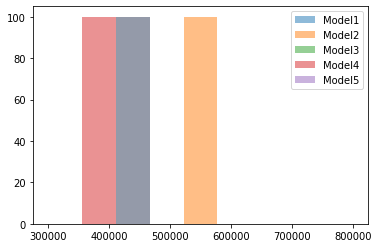

8037891.116974402
451079.4598167451
537240.7375532845
391660.0810494812
451079.4598167451


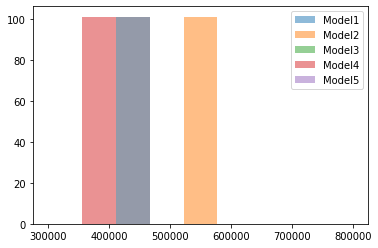

8037748.224125929
451061.9069593066
537218.4956285866
391687.47425079625
451061.9069593066


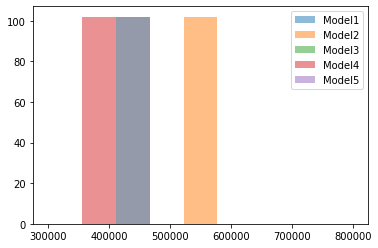

8037615.218119054
451057.9603894066
537212.8617609043
391656.791589743
451057.9603894066


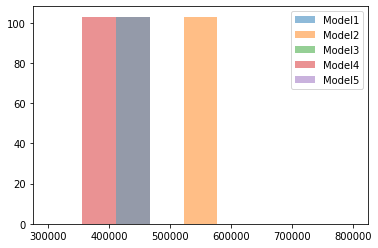

8037462.157342704
451038.97099255654
537187.0546406085
391641.8706377792
451038.97099255654


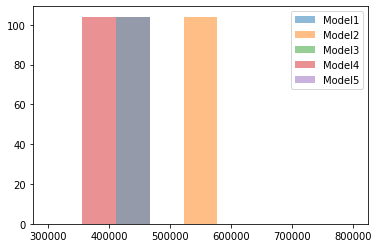

8037289.5849859975
451017.4357642746
537205.7173443012
391642.6938097911
451017.4357642746


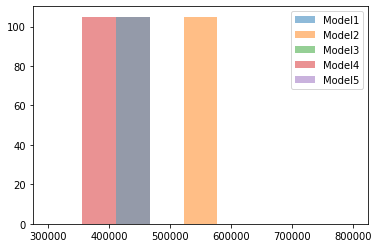

8037138.836151277
451053.009607861
537207.7698911424
391655.9006502195
451053.009607861


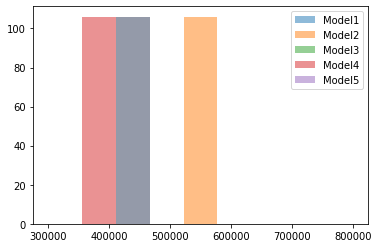

8036971.160445895
451035.41842795425
537194.9041001541
391615.75688357034
451035.41842795425


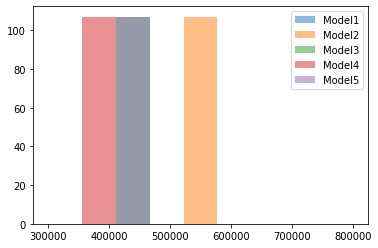

8036957.852229995
451037.2907171651
537205.257957336
391640.5362371153
451037.2907171651


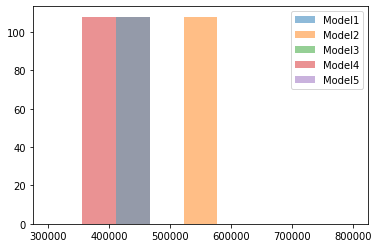

8036836.593233817
451002.45125619275
537190.0784321962
391613.08845994854
451002.45125619275


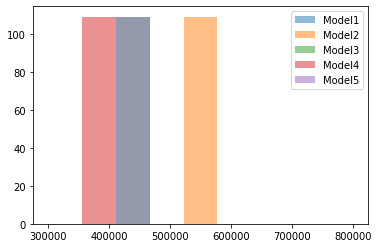

8037076.1616190495
450990.619440179
537179.7501639287
391595.9949308298
450990.619440179


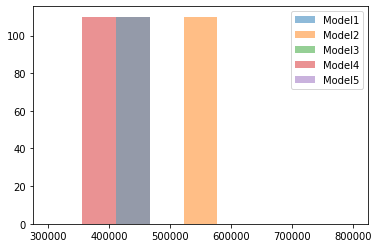

8036917.876355924
451003.465799575
537168.1725933186
391643.5399618621
451003.465799575


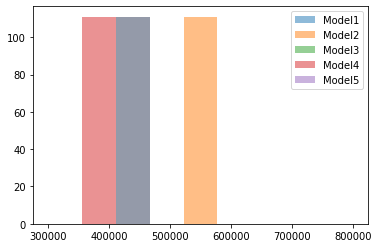

8037091.425329706
450994.6203239834
537141.1321369888
391721.51862424
450994.6203239834


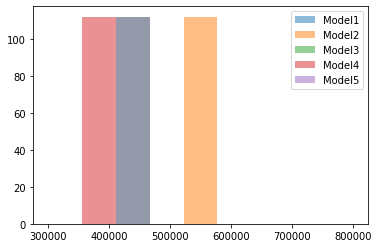

8036929.415617308
450981.1810183442
537238.6717423135
391799.2057247581
450981.1810183442


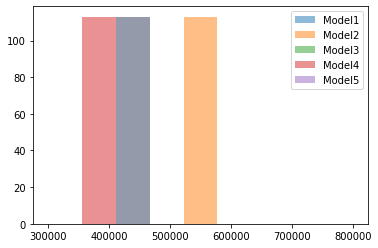

8036851.780420582
450954.2385192006
537230.1119244265
391791.9387596897
450954.2385192006


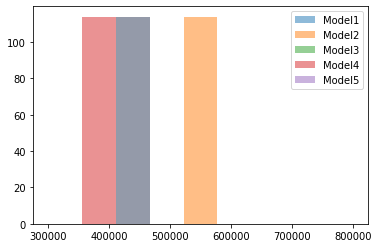

8036776.10028383
450975.7072656734
537196.8230948644
391769.63407488534
450975.7072656734


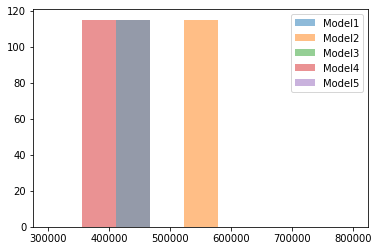

8036928.385497088
450978.93604469387
537167.5417852817
391782.5184204511
450978.93604469387


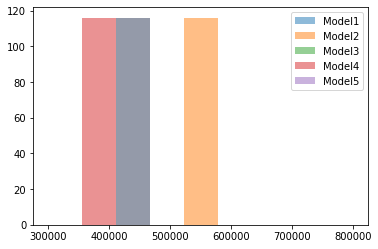

8036770.443902844
451023.6116091265
537201.3735228517
391768.808439108
451023.6116091265


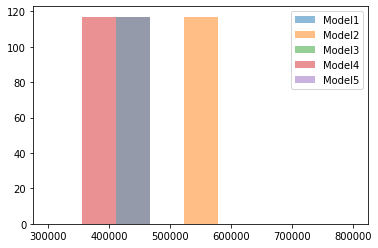

8036703.0145648355
451028.9704822607
537239.7416096022
391736.79317057936
451028.9704822607


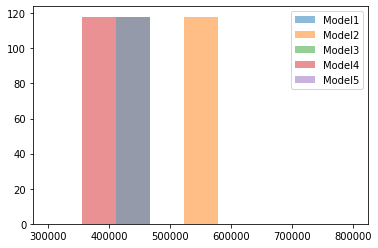

8036666.18271998
451022.30844604556
537222.5855501407
391745.0346991484
451022.30844604556


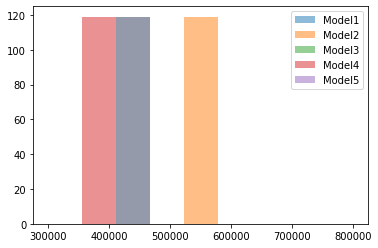

8036598.424188273
451022.40343523346
537216.9594017055
391744.67897522065
451022.40343523346


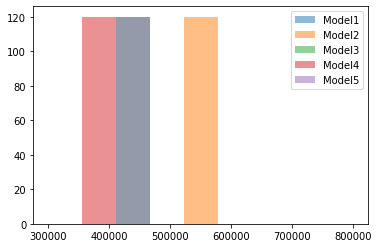

8036925.859777671
451011.2796526256
537196.7473011368
391740.08167131164
451011.2796526256


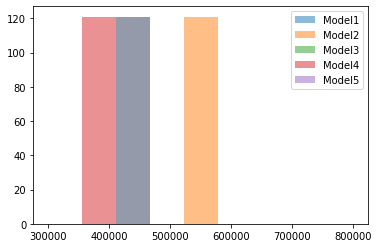

8036776.778313072
451011.8742727428
537194.6316128252
391770.7291957158
451011.8742727428


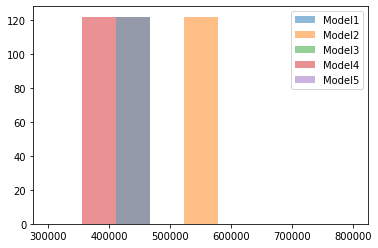

8036906.247988017
450981.65812284563
537171.5967526626
391772.3675640064
450981.65812284563


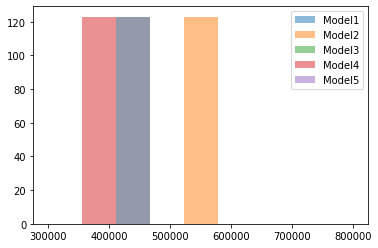

8036760.669870682
450979.52764845314
537180.9796943157
391737.84817021067
450979.52764845314


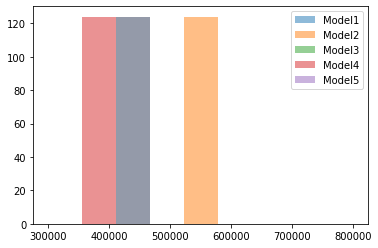

8036669.926530223
450972.4133832081
537156.7623577287
391737.29540573485
450972.4133832081


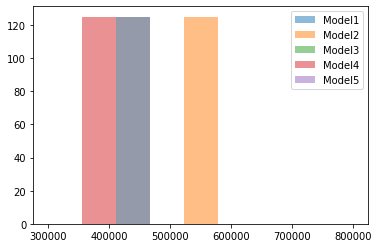

8036687.338360967
450976.1059312786
537139.8748500069
391753.45919189806
450976.1059312786


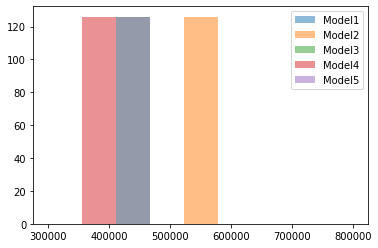

8036767.585904161
450965.4185693795
537151.3750617921
391799.3880951163
450965.4185693795


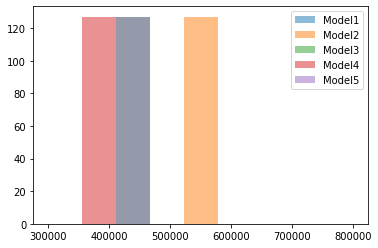

8036647.4644874595
450956.6114803399
537129.1535353326
391766.2521088604
450956.6114803399


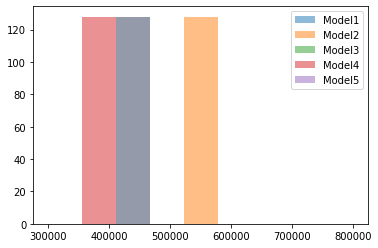

8036844.886157655
451034.40145474975
537120.8871214055
391753.0508124712
451034.40145474975


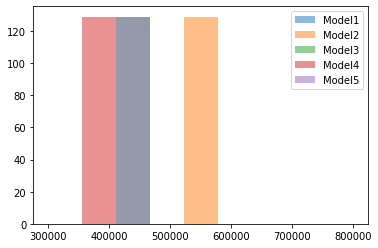

8036826.870160099
451002.8195728011
537104.8912011128
391763.9246151854
451002.8195728011


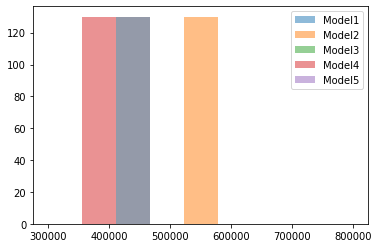

8036794.727947651
450976.8544818411
537124.9349809325
391759.6487337109
450976.8544818411


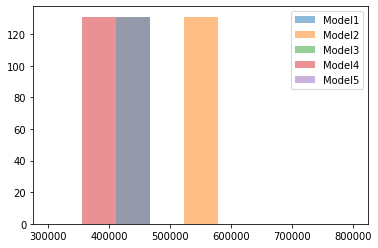

8036920.429587314
451062.7223332891
537135.8177658714
391739.01217118796
451062.7223332891


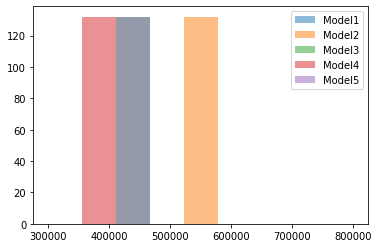

8036791.323154786
451086.832308068
537137.2087972298
391727.59136939
451086.832308068


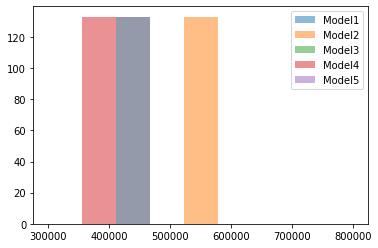

8036950.489401565
451122.8426256788
537111.422143516
391750.952615543
451122.8426256788


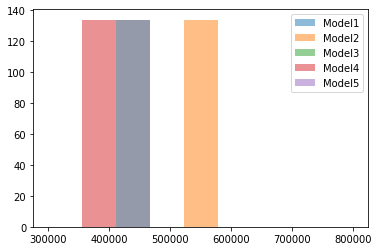

8037150.424196932
451150.5891167375
537095.4246162646
391719.41022280784
451150.5891167375


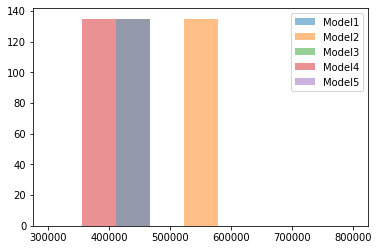

8037095.844139362
451134.0179668558
537103.7813240798
391756.8749151145
451134.0179668558


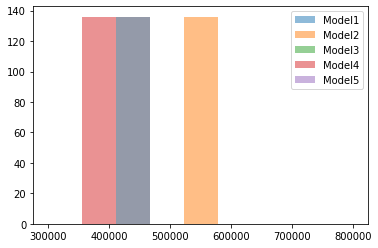

8037300.1805709265
451146.78828545904
537103.9664822461
391737.43281843944
451146.78828545904


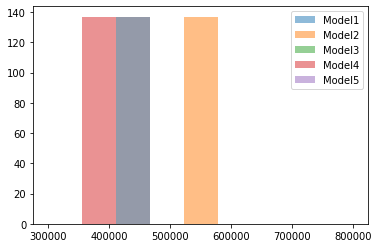

8037186.9485784955
451136.0875156916
537095.6409596464
391734.4363204019
451136.0875156916


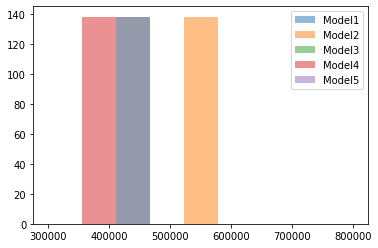

8037053.388345691
451211.8848431346
537088.8617072714
391717.3314635806
451211.8848431346


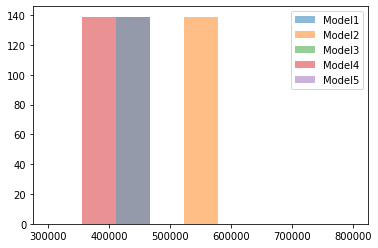

8036961.018202288
451259.6668448985
537102.2208871924
391704.20319624053
451259.6668448985


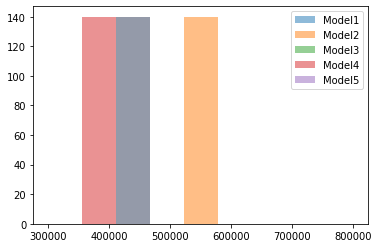

8036840.29977781
451256.31812609563
537083.8861195048
391707.9047732202
451256.31812609563


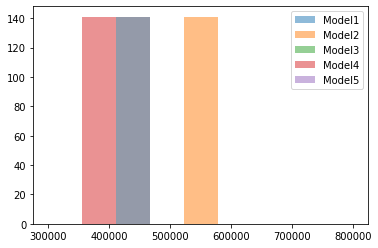

8036853.9292296255
451246.82115860365
537103.1446352745
391726.4759604928
451246.82115860365


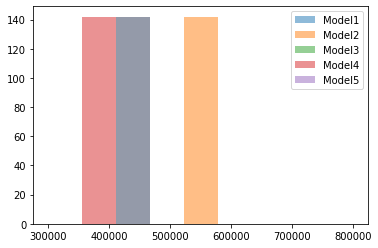

8037139.4738709545
451272.37377847347
537087.2392637895
391706.7127507781
451272.37377847347


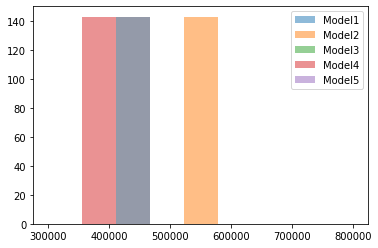

8037296.13709361
451286.767143007
537074.3204238594
391728.6408085807
451286.767143007


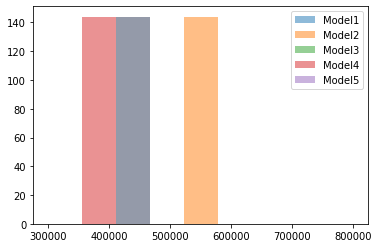

8037180.718930047
451271.296220758
537083.5120218394
391801.11762459803
451271.296220758


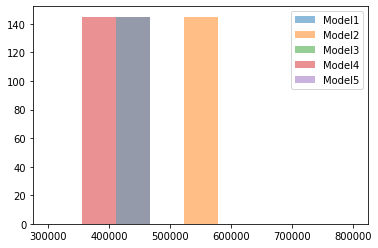

8037073.133158568
451283.95503587107
537087.5191180963
391783.95004068635
451283.95503587107


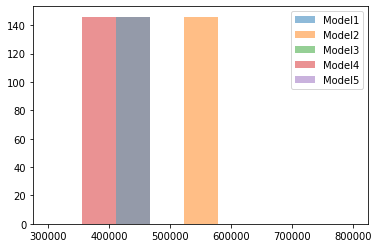

8037115.982762376
451266.5408509066
537074.58162267
391756.2409479435
451266.5408509066


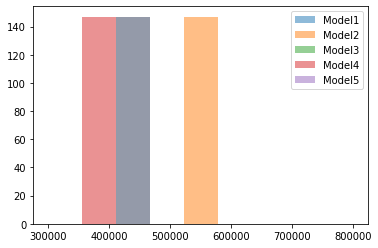

8037018.007860497
451275.9935426499
537079.8130026311
391743.52755981823
451275.9935426499


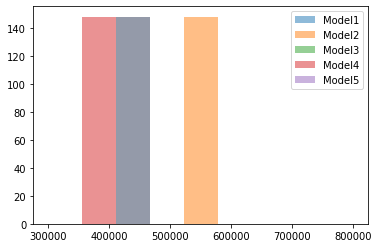

8036912.210006837
451269.02695921354
537109.6265388712
391745.41438744194
451269.02695921354


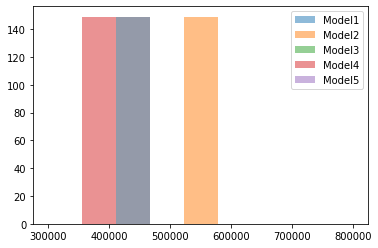

8036921.0470325155
451270.43902478594
537098.4893982708
391759.00629755505
451270.43902478594


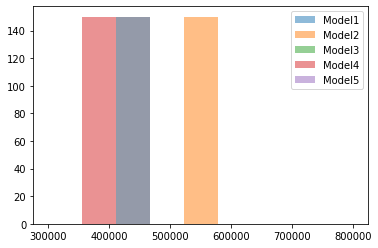

8036807.609326012
451350.8531118289
537098.2917933759
391764.4958021252
451350.8531118289


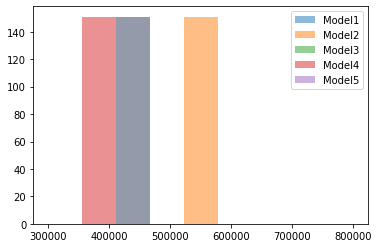

8036703.692936184
451369.09995416383
537094.6639303848
391789.211588338
451369.09995416383


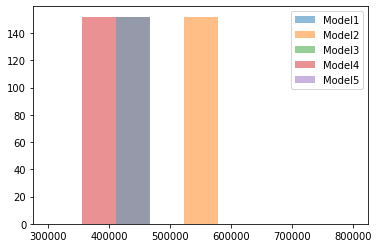

8036605.351269641
451373.9251756607
537080.6930509093
391782.12293531187
451373.9251756607


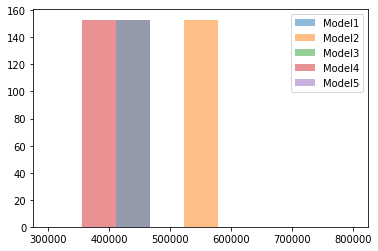

8036576.045364544
451390.62239646836
537061.755356705
391760.2785310684
451390.62239646836


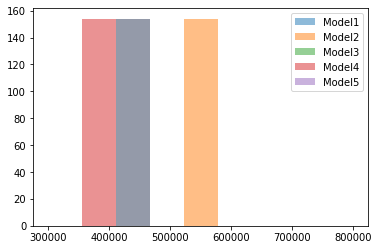

8036473.68853116
451384.52972929936
537055.9989022727
391753.9787621153
451384.52972929936


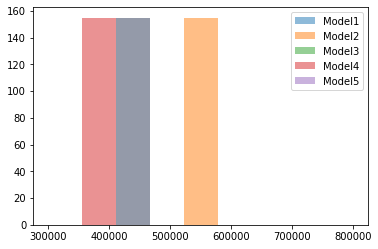

8036546.903660551
451362.688087133
537042.7862457008
391744.81313766807
451362.688087133


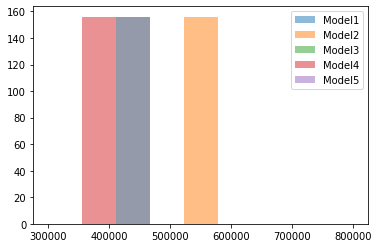

8036534.336496565
451347.59119208955
537059.3824783018
391814.75693248864
451347.59119208955


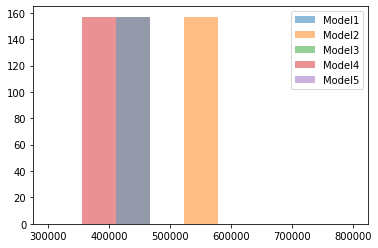

8036446.085121045
451324.86612261325
537044.979705314
391802.72750520724
451324.86612261325


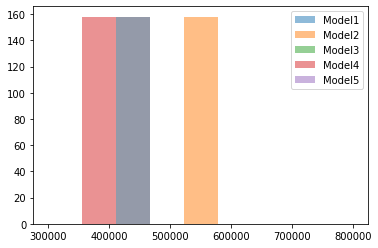

8036599.723689286
451306.85246333346
537021.1439843272
391834.2762959156
451306.85246333346


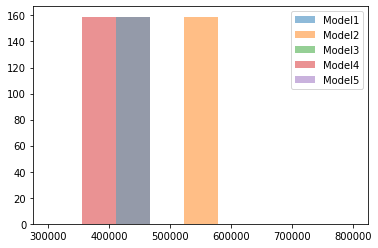

8036836.6598855285
451343.8441765312
537000.9048158061
391843.8785148756
451343.8441765312


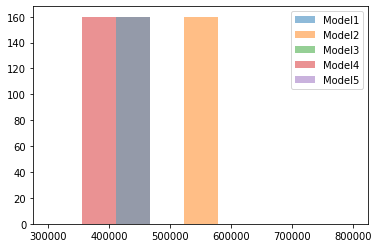

8036780.81240161
451322.44326691877
536980.6174051533
391850.1535711381
451322.44326691877


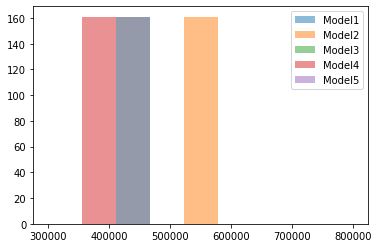

8036726.197738868
451318.03059296694
536964.7584658547
391828.9491248357
451318.03059296694


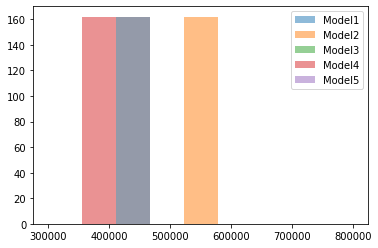

8036614.463499049
451310.29292901105
536949.8790952566
391816.6783219445
451310.29292901105


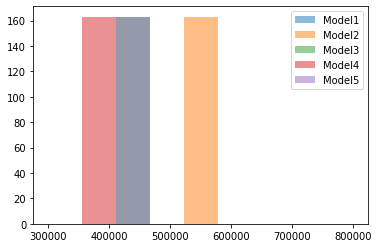

8036596.318511329
451291.37421488506
536993.7040021047
391815.71412206197
451291.37421488506


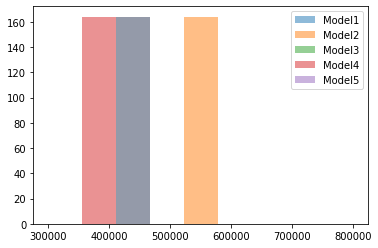

8036545.208596685
451285.0959672597
536984.3569363627
391823.9495253429
451285.0959672597


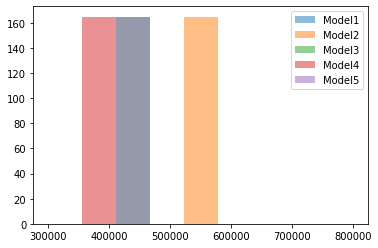

8037064.908303724
451285.32549272175
536975.6253706949
391801.0710200431
451285.32549272175


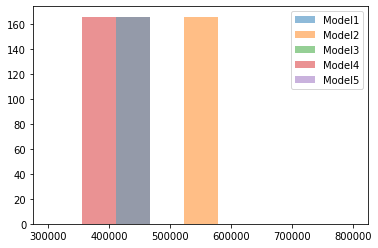

8037007.066272159
451269.5652562864
536960.8359936962
391802.4264568973
451269.5652562864


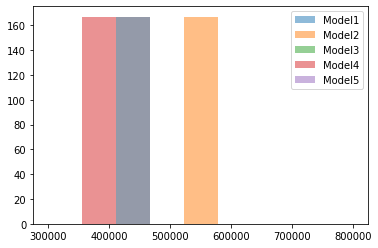

8036899.885779554
451246.2778625727
536945.7525699036
391784.3995826631
451246.2778625727


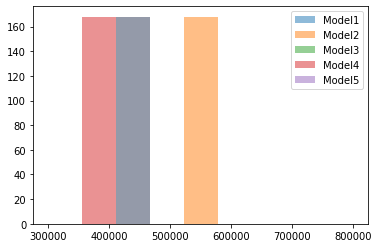

8036911.006922383
451236.8855304108
536962.8734916709
391772.89506507025
451236.8855304108


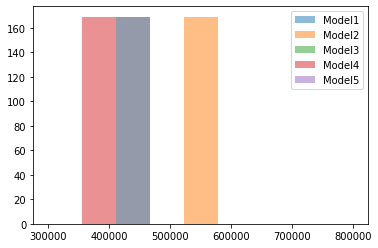

8036838.910589648
451225.4477345153
536951.6228540287
391797.4797714159
451225.4477345153


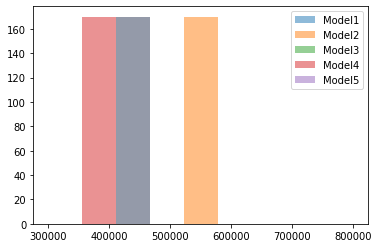

8036794.540415993
451242.5110422927
536979.8668506827
391786.8830728478
451242.5110422927


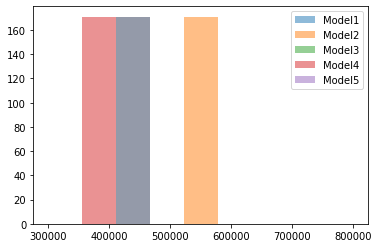

8037125.768633831
451246.36786169023
536968.3006044864
391799.77039356285
451246.36786169023


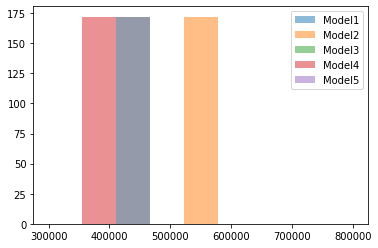

8037119.131958226
451226.4259479687
536961.4458847302
391782.08219931583
451226.4259479687


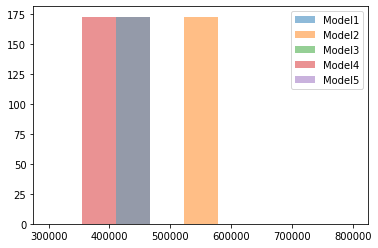

8037055.814290215
451248.6483629764
536945.73183081
391761.16934178764
451248.6483629764


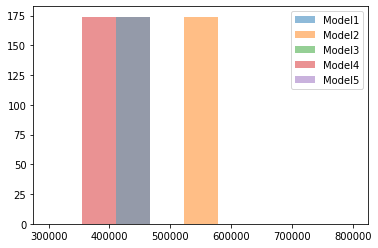

8037094.78475778
451237.4807045397
536925.7250308548
391744.42760550184
451237.4807045397


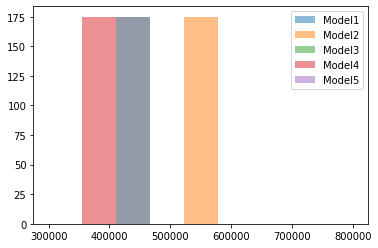

8036989.159439543
451229.43178409484
536956.1351833299
391760.7536972701
451229.43178409484


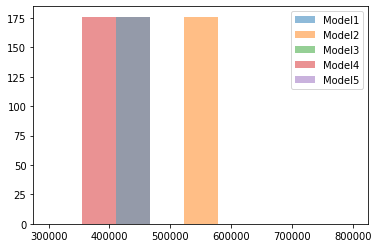

8036886.795684287
451208.73988564144
536976.425178744
391741.789925173
451208.73988564144


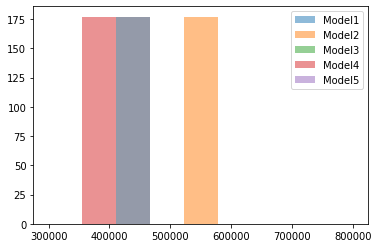

8036875.174947946
451194.3537085929
537005.0630038289
391742.1638372177
451194.3537085929


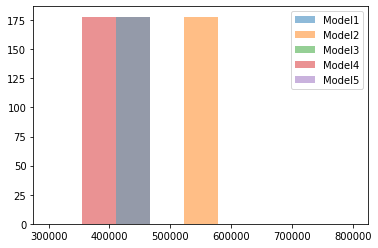

8036778.707013041
451197.8046707989
537009.830334142
391726.9030992692
451197.8046707989


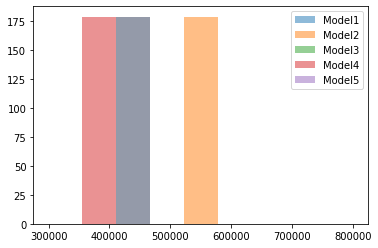

8037221.557673445
451205.5257643621
537001.1973045601
391711.1869599794
451205.5257643621


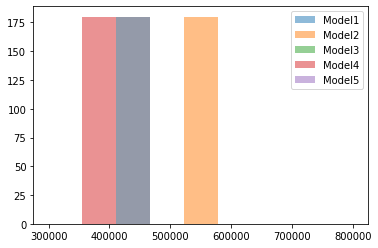

8037220.810260464
451220.0555526244
536983.9129970607
391690.4997563318
451220.0555526244


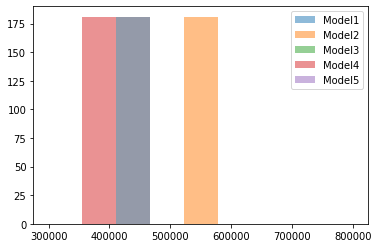

8037149.844158977
451221.1724024181
537008.0144498432
391679.14845528273
451221.1724024181


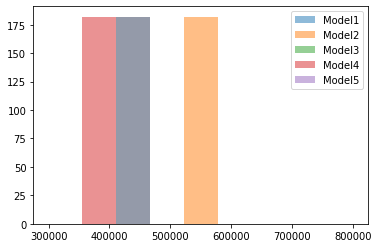

8037164.301575569
451221.03216211963
537009.1386478293
391661.5457171036
451221.03216211963


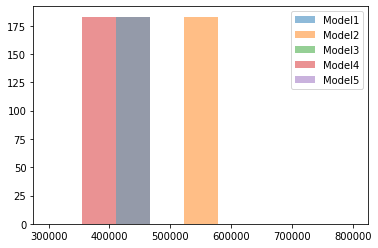

8037069.758199638
451204.37211946066
536989.1936880277
391652.2218777196
451204.37211946066


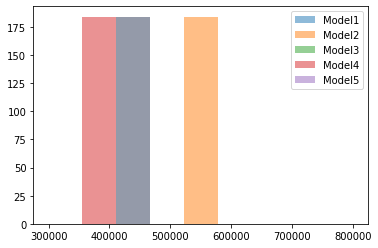

8037124.755202461
451193.5066956836
536985.2621488776
391651.0129718025
451193.5066956836


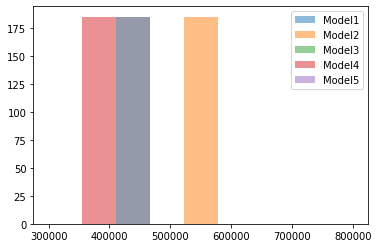

8037384.948915534
451173.911953587
536987.6054565777
391675.3802155969
451173.911953587


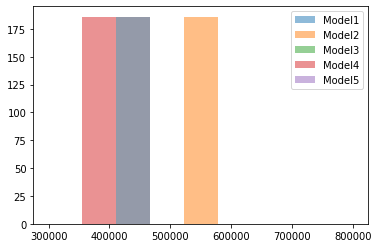

8037435.800057511
451209.21012317034
537004.6950433168
391693.27858790365
451209.21012317034


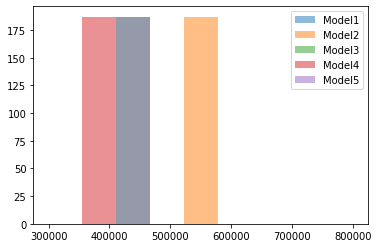

8037381.781555057
451196.0088097284
537016.6258315605
391683.2408076016
451196.0088097284


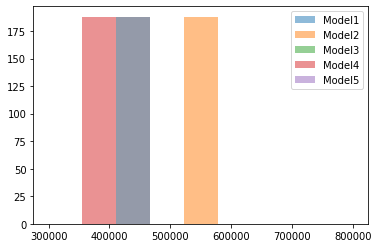

8037320.071926067
451183.14736206934
537043.7777021669
391678.25651902345
451183.14736206934


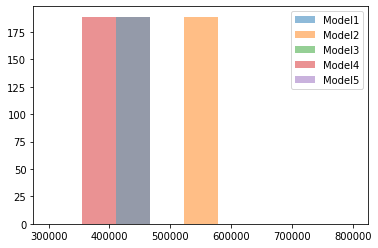

8037235.194669542
451187.4290298942
537057.9020723368
391667.3231396137
451187.4290298942


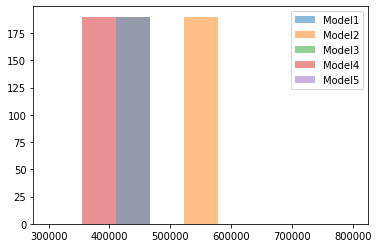

8037170.006233913
451184.3558944173
537073.2577475242
391652.568773448
451184.3558944173


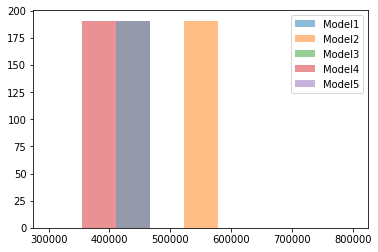

8037300.994408566
451189.88849017886
537066.308554016
391692.3069122044
451189.88849017886


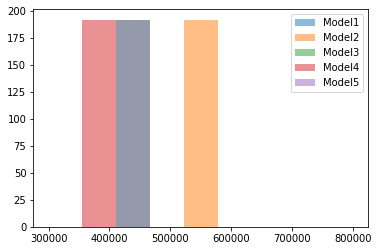

8037417.507451992
451254.325778873
537050.1439554394
391689.08006072085
451254.325778873


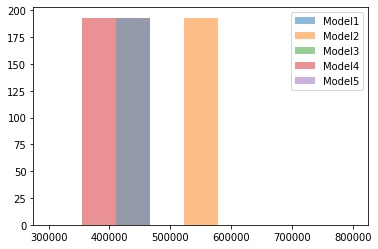

8037404.15431996
451251.59515931236
537032.8409815261
391697.523985496
451251.59515931236


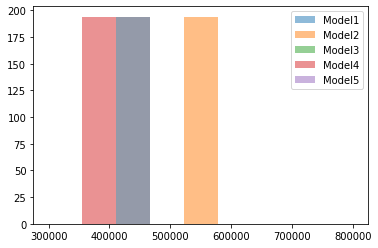

8037368.046118435
451233.5597342583
537046.0503303111
391699.1773130053
451233.5597342583


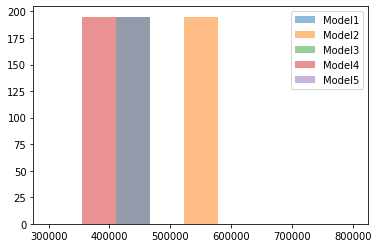

8037282.436148639
451223.1826777443
537037.9523886945
391706.1445489258
451223.1826777443


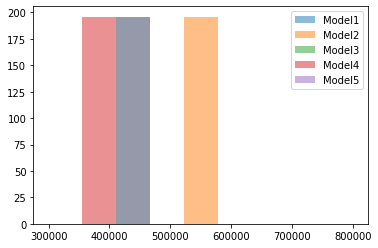

8037206.154844785
451236.4440150604
537059.0944771001
391688.8275621783
451236.4440150604


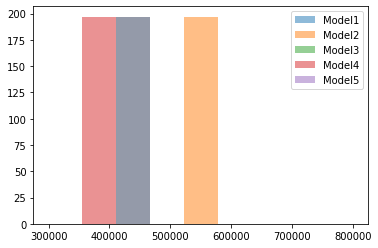

8037216.270319399
451222.2280686308
537040.683904688
391679.9571793946
451222.2280686308


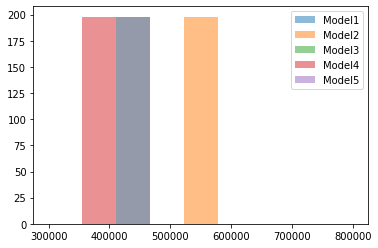

8037285.239984016
451226.3400639615
537024.0774379752
391663.4770481935
451226.3400639615


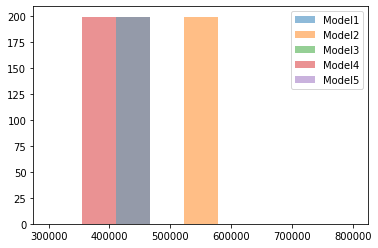

8037352.436930947
451227.9241525264
537035.5690860503
391671.49280140817
451227.9241525264


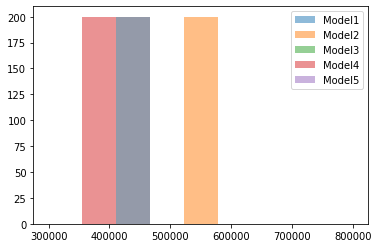

In [65]:
#Problem 4: Bootstrap
mseboostrap_model1=[]
mseboostrap_model2 =[]
mseboostrap_model4 = []
mseboostrap_model5 =[]
mseboostrap_model3=[]

for i in np.arange(200):
    sample_x1 = np.random.choice(x1, size=100, replace=False)
    index = np.random.randint(0,x1.shape[0], size=len(x1))
    sample_x1 = x1[index]
    sample_y = yvar[index]
    first_model = sm.OLS(sample_y, sample_x1)
    regboot1 = first_model.fit()
    y_pred = regboot1.predict(x1)
    noise1 = sm.tools.eval_measures.mse(yvar, y_pred)
    mseboostrap_model1 = np.append(mseboostrap_model1, noise1)
    print(np.mean(mseboostrap_model1))

    index3 = np.random.randint(0,x3.shape[0], size=len(x3))
    sample_x3 = x3[index3]
    sample_y = yvar[index3]
    third_model = sm.OLS(sample_y, sample_x3)
    regboot3 = third_model.fit()
    y_pred3 = regboot3.predict(x3)
    noise3 = sm.tools.eval_measures.mse(yvar, y_pred3)
    mseboostrap_model3 = np.append(mseboostrap_model3, noise3)
    print(np.mean(mseboostrap_model3))
    
    index2 = np.random.randint(0,x2.shape[0], size=len(x2))
    sample_x2 = x2[index2]
    sample_y = yvar[index2]
    second_model = sm.OLS(sample_y, sample_x2)
    regboot2 = second_model.fit()
    y_pred2 = regboot2.predict(x2)
    noise2 = sm.tools.eval_measures.mse(yvar, y_pred2)
    mseboostrap_model2 = np.append(mseboostrap_model2, noise2)
    print(np.mean(mseboostrap_model2))
    
    index4 = np.random.randint(0,x4.shape[0], size=len(x4))
    sample_x4 = x4[index4]
    sample_y = yvar[index4]
    fourth_model = sm.OLS(sample_y, sample_x4)
    regboot4 = fourth_model.fit()
    y_pred4 = regboot4.predict(x4)
    noise4 = sm.tools.eval_measures.mse(yvar, y_pred4)
    mseboostrap_model4 = np.append(mseboostrap_model4, noise4)
    print(np.mean(mseboostrap_model4))
    
    index5 = np.random.randint(0,x5.shape[0], size=len(x5))
    sample_x5 = x5[index5]
    sample_y = yvar[index5]
    fifth_model = sm.OLS(sample_y, sample_x5)
    regboot5 = fifth_model.fit()
    y_pred5 = regboot5.predict(x5)
    noise5 = sm.tools.eval_measures.mse(yvar, y_pred3)
    mseboostrap_model5 = np.append(mseboostrap_model5, noise5)
    print(np.mean(mseboostrap_model5))

    bins = np.linspace(300000, 800000, 10)

    plt.hist(mseboostrap_model1, bins, alpha=0.5, label='Model1')
    plt.hist(mseboostrap_model2, bins, alpha=0.5, label='Model2')
    plt.hist(mseboostrap_model3, bins, alpha=0.5, label='Model3')
    plt.hist(mseboostrap_model4, bins, alpha=0.5, label='Model4')
    plt.hist(mseboostrap_model5, bins, alpha=0.5, label='Model5')

    plt.legend(loc='upper right')
    plt.show()




It seems like after trial and error the lower the number of terms the lower the bootstrap MSE's are. 

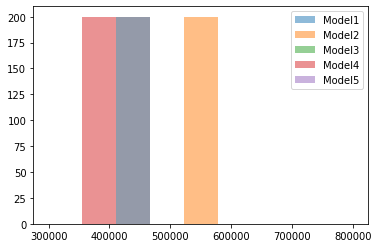

In [64]:
bins = np.linspace(300000, 800000, 10)

plt.hist(mseboostrap_model1, bins, alpha=0.5, label='Model1')
plt.hist(mseboostrap_model2, bins, alpha=0.5, label='Model2')
plt.hist(mseboostrap_model3, bins, alpha=0.5, label='Model3')
plt.hist(mseboostrap_model4, bins, alpha=0.5, label='Model4')
plt.hist(mseboostrap_model5, bins, alpha=0.5, label='Model5')

plt.legend(loc='upper right')
plt.show()

In [38]:
#Problem 5 Newton Ralphson
def newton_raphson(X, y):
    #beta_
    X = np.matrix(X)
    y = np.matrix(y)
    beta = np.matrix(np.ones(X.shape[1])*(2/np.sqrt(30))).T
    beta_new = 0
    p = 0
    def p(x):
        return np.exp(x) / (1 + np.exp(x))
    while np.any(np.abs(beta_new - beta)) >= .00001:
        #update p 
        p = p(np.dot(X, beta))
        W = np.array(p) * np.array(1 - p)
        z = np.dot(X, beta) + np.dot(np.linalg.inv(W), y - p)
        beta_new = np.dot(np.linalg.inv(np.dot(X.T, np.dot(W, X))), np.dot(X.T, np.dot(W, z)))
        beta = beta_new
        return [beta, beta_new]

In [40]:
#Problem 6 Simplify Method
def simplified_newton_raphson(X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    beta_old = np.matrix(np.ones(X.shape[1])*(2/np.sqrt(30))).T
    beta_new = 0
    p = 0
    def p(x):
        return np.exp(x) / (1 + np.exp(x))
    while np.any(np.abs(beta_new - beta_old)) >= .00001:
        p = p(np.dot(X, beta_old))
        W = np.array(p) * np.array(1 - p)
#Difference in simplified here
        beta_new = beta_old + np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y -p))
        beta_old = beta_new
        return [beta_old, beta_new]

In [43]:
#Problem 7 Testing it
x, y = np.random.multivariate_normal([0,0], [[1,0], [0,20]], 500).T
newton_raphson(x,y)
simplified_newton_raphson(x, y)


[matrix([[-5.56963485e+03, -1.47963485e+03, -5.56763485e+03, ...,
           6.68636515e+03, -6.20563485e+03,  4.50636515e+03],
         [-1.05676349e+04, -2.74563485e+03, -1.05356349e+04, ...,
           1.26563651e+04, -1.14716349e+04,  8.60836515e+03],
         [ 4.08423651e+04,  1.04053651e+04,  4.00123651e+04, ...,
          -4.80296349e+04,  4.37463651e+04, -3.23916349e+04],
         ...,
         [ 1.37636515e+03,  2.40365148e+02,  1.21636515e+03, ...,
          -1.59963485e+03,  1.95236515e+03, -7.67634852e+02],
         [-1.93634852e+02, -4.11348516e+01, -1.72634852e+02, ...,
           2.24365148e+02, -1.92634852e+02,  1.06365148e+02],
         [ 3.55526484e+01,  1.29276484e+01,  3.54276484e+01, ...,
          -4.26973516e+01,  5.39276484e+01, -3.46348516e+01]]),
 matrix([[-5.56963485e+03, -1.47963485e+03, -5.56763485e+03, ...,
           6.68636515e+03, -6.20563485e+03,  4.50636515e+03],
         [-1.05676349e+04, -2.74563485e+03, -1.05356349e+04, ...,
           1.26563651e

In [44]:
glm = sm.GLM(x, y, family=sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      499
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -837.13
Date:                Mon, 02 Nov 2020   Deviance:                       18337.
Time:                        23:01:41   Pearson chi2:                 2.40e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0190      0.020     -0.953      0.341      -0.058       0.020
==============================================================================
"""